#### Na célula abaixo são instaladas algumas bibliotecas importantes para o desenvolvimento de ambientes de aprendizado por reforço e visualização. Explicando detalhadamente cada instalação:

- *swig* - (Simplified Wrapper and Interface Generator) é uma ferramenta que conecta programas escritos em C e C++ com linguagens de alto nível, como Python. Pode ser útil para integrar código existente ou bibliotecas em seu projeto.

- *stable-baselines3* - Esta biblioteca é uma implementação em Python de algoritmos populares de aprendizado por reforço. Ela oferece uma variedade de algoritmos, como PPO (Proximal Policy Optimization), A2C (Advantage Actor-Critic), DDPG (Deep Deterministic Policy Gradients), entre outros.

- *ufal.pybox2d* - O pybox2d é uma interface Python para a biblioteca de física de jogos Box2D. Essa biblioteca pode ser útil para simulações físicas em jogos ou ambientes de aprendizado por reforço que envolvem dinâmica física.

- *moviepy* - uma biblioteca para edição de vídeos em Python. Pode ser utilizada para criar visualizações ou animações baseadas nos resultados do aprendizado por reforço.

- *pygame* - uma biblioteca de jogos para Python. Pode ser útil para criar interfaces gráficas interativas em ambientes de aprendizado por reforço ou para a visualização de resultados.

A instalação dessas bibliotecas prepara o ambiente para a implementação de algoritmos de aprendizado por reforço e a criação de visualizações relacionadas ao seu projeto.

In [1]:
%pip install swig
%pip install stable-baselines3
%pip install ufal.pybox2d
%pip install moviepy
%pip install pygame

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Na célula abaixo são importados os módulos necessários para o desenvolvimento e execução dos seus experimentos de aprendizado por reforço. Analisando cada importação:


- *from IPython.display import clear_output* - O clear_output é utilizado para limpar a saída do console no ambiente Jupyter Notebook, proporcionando uma visualização mais limpa e organizada.

- *from moviepy.editor import ipython_display as video_player* - A importação de ipython_display do módulo moviepy.editor é feita para a exibição de vídeos diretamente no ambiente Jupyter Notebook.

- *from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3* - Aqui, você está importando vários algoritmos de aprendizado por reforço fornecidos pela biblioteca stable_baselines3. Cada um desses algoritmos tem suas características específicas e pode ser escolhido com base nas necessidades do seu projeto.

- *from stable_baselines3.common.monitor import Monitor* - A classe Monitor é usada para monitorar o desempenho do ambiente, fornecendo estatísticas úteis durante o treinamento dos modelos.

- *from stable_baselines3.common.callbacks import BaseCallback, CallbackList, CheckpointCallback* - Importações relacionadas à gestão de callbacks durante o treinamento, permitindo a execução de ações personalizadas em momentos específicos, como salvar modelos.

- *import gymnasium as gym* - O módulo gymnasium é uma extensão da biblioteca OpenAI Gym, que fornece uma ampla variedade de ambientes para treinamento e avaliação de algoritmos de aprendizado por reforço.

- *import imageio* - A biblioteca imageio é frequentemente usada para trabalhar com imagens e vídeos. Pode ser útil para criar visualizações ou salvar vídeos gerados durante o treinamento.

- *import numpy as np* - O numpy é uma biblioteca fundamental para operações matemáticas e manipulação de arrays. É amplamente utilizado em projetos de aprendizado por reforço.

- *import matplotlib.pyplot as plt* - matplotlib.pyplot é uma biblioteca de visualização que permite a criação de gráficos e plotagens, útil para análise de resultados.

- *from stable_baselines3.common.vec_env import DummyVecEnv* - DummyVecEnv é uma classe usada para envolver ambientes do Gym para garantir compatibilidade com os modelos da stable_baselines3.

- *import os* - O módulo os fornece funcionalidades relacionadas ao sistema operacional, como manipulação de arquivos e diretórios.

Essas importações estabelecem as bases necessárias para o desenvolvimento do seu código de aprendizado por reforço.

In [2]:
from IPython.display import clear_output
from moviepy.editor import ipython_display as video_player
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback, CallbackList, CheckpointCallback
import gymnasium as gym
import imageio
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
import os

#### Na célula abaixo, são definidas duas partes importantes para o monitoramento e visualização do treinamento dos modelos de aprendizado por reforço:

- Função *gerar_video_e_exibir(frames, nome_modelo)*:
    - Recebe uma lista de frames (imagens) e o nome do modelo como parâmetros.
    - Gera um vídeo (no formato MP4) a partir dos frames fornecidos.
    - Exibe o vídeo diretamente no ambiente Jupyter Notebook usando a função video_player do módulo moviepy.editor.
    - Retorna o objeto de vídeo criado.

- Classe PlottingCallback(BaseCallback):
    - Esta é uma classe de callback personalizada, derivada da classe BaseCallback fornecida pelo stable_baselines3. Ela é usada para plotar gráficos de progresso durante o treinamento do modelo. O método *_on_step* é chamado a cada passo do treinamento e verifica se a frequência definida para o gráfico foi atingida. Se a frequência foi atingida, ela extrai as recompensas acumuladas e plota um gráfico mostrando a evolução da recompensa média ao longo do tempo.

Essas implementações são valiosas para monitorar o treinamento e entender o desempenho dos seus modelos ao longo do tempo.

### Classes e funções auxiliares

In [3]:
def gerar_video_e_exibir(frames, nome_modelo):
    nome_video = f'{nome_modelo}.mp4'
    with imageio.get_writer(nome_video, fps=30) as video:
        for frame in frames:
            video.append_data(frame)
    return video_player(nome_video, autoplay=1, loop=1, maxduration=3000)


class PlottingCallback(BaseCallback):
    def __init__(self, frequencia_grafico=1000, *args, **kwargs):
        super(PlottingCallback, self).__init__(*args, **kwargs)
        self.frequencia_grafico = frequencia_grafico
        self.x, self.y = [], []
        plt.ion()

    def _on_step(self) -> bool:
        if self.num_timesteps % self.frequencia_grafico == 0:
            rewards = [info['r'] for info in self.model.ep_info_buffer]
            if rewards:
                self.x.append(self.num_timesteps)
                self.y.append(np.mean(rewards))
                clear_output(wait=True)
                plt.clf()
                plt.plot(self.x, self.y)
                plt.title('Progresso do Treinamento')
                plt.xlabel('Número de passos')
                plt.ylabel('Recompensa média')
                plt.pause(0.01)
        return True

#### Na célula abaixo, é treinado um modelo de aprendizado por reforço utilizando o ambiente MountainCar-v0 do OpenAI Gym. Analisando o código:

- Definição do Desafio:
    - O desafio escolhido é o *MountainCar-v0*.
- Função *recompensa_tardia(env, obs, action, next_obs)*:
    - Define uma política de recompensa customizada para o ambiente. No caso, se a posição do carro estiver acima de 0.5, a recompensa é 1.0; caso contrário, a recompensa é -0.1.
- Lista de Algoritmos de RL (RL_ALGORITHMS):
    - Contém os algoritmos de aprendizado por reforço disponíveis no stable_baselines3 (nesse caso, apenas o DQN está sendo utilizado).
- Loop de Treinamento para cada Algoritmo:
    - Para cada algoritmo na lista::
        - Obtém o nome do algoritmo para identificação.
        - Define o nome do modelo, que inclui o nome do algoritmo e o desafio.
        - Cria o ambiente usando o Gym, envolvendo-o na classe Monitor para monitorar o desempenho.
        - Inicializa o modelo DQN com parâmetros específicos.
        - Chama o método *learn* para treinar o modelo com um callback personalizado (PlottingCallback) para monitorar o progresso.
        - Salva o modelo treinado.

Este código realiza o treinamento de um modelo DQN no ambiente MountainCar-v0 e monitora o progresso através do callback de plotagem. 

### Treinamento para MountainCar-v0

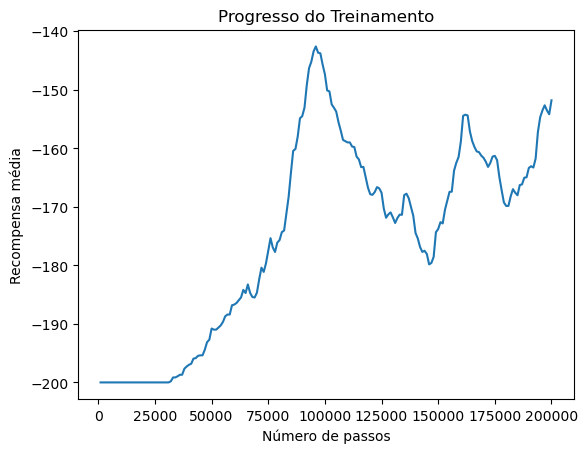

In [4]:
desafio = "MountainCar-v0"

def recompensa_tardia(env, obs, action, next_obs):
    if obs[1] >= 0.5:
      return 1.0
    return -0.1

#RL_ALGORITHMS = [A2C, DDPG, DQN, HER, PPO, SAC, TD3]
RL_ALGORITHMS = [DQN]
for RL in RL_ALGORITHMS:
    nome_algoritmo = str(RL).split('.')[-1].upper()
    nome_modelo = f"/content/Modelo{nome_algoritmo}_Gym_{desafio}"
    print(nome_modelo)
    env = Monitor(gym.make(desafio))
    nome_modelo = f"/content/ModeloDQN_Gym_{desafio}"
    modelo = DQN(
      "MlpPolicy",
      env,
      verbose=1,
      train_freq=16,
      gradient_steps=8,
      gamma=0.99,
      exploration_fraction=0.2,
      exploration_final_eps=0.07,
      target_update_interval=600,
      learning_starts=1000,
      buffer_size=10000,
      batch_size=128,
      learning_rate=4e-3,
      policy_kwargs=dict(net_arch=[256, 256]),
      seed=2,
    )
    modelo.learn(total_timesteps=200000, callback=PlottingCallback())
    modelo.save(nome_modelo)

#### Na célula abaixo, é carregado o modelo treinado e sua execução no ambiente MountainCar-v0 é visualizada. Analisando o código:

- Carregamento do Modelo Treinado:
    - Utiliza o método *DQN.load(nome_modelo)* para carregar o modelo treinado previamente e salvo no arquivo especificado por nome_modelo.
- Configuração do Ambiente de Visualização:
    - Cria um novo ambiente do Gym *(gym.make(desafio, render_mode="rgb_array"))* configurado para gerar um array de pixels *(rgb_array)* como saída durante a renderização.
- Execução do Modelo no Ambiente:
    - Inicializa o ambiente.
    - Para cada passo (máximo de 2000):
        - O modelo prevê uma ação com base na observação atual.
        - A ação é executada no ambiente, e o próximo estado, recompensa e outras informações são obtidos.
        - O frame correspondente à renderização do ambiente é adicionado à lista frames.
        - Se o episódio estiver concluído (done), o ambiente é redefinido para iniciar um novo episódio.
- Fechamento do Ambiente:
    - Fecha o ambiente após a execução do loop.
- Criação e Exibição do Vídeo:
    - Utiliza a função *gerar_video_e_exibir* para criar um vídeo a partir dos frames coletados durante a execução e exibi-lo diretamente no ambiente Jupyter Notebook.

Este código permite visualizar como o modelo treinado se comporta no ambiente *MountainCar-v0*. 

### Exibição do resultado treinado para MountainCar-v0

In [8]:
model = DQN.load(nome_modelo)
env = gym.make(desafio, render_mode="rgb_array")

frames = []
obs, _ = env.reset()

print(obs)

for _ in range(2000):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = env.step(action)
    frames.append(env.render())
    if done:
        obs, _ = env.reset()
        break

env.close()

gerar_video_e_exibir(frames, nome_modelo)

  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/82/61/93ae7afbd931a70510cfdf0a7bb0007540020b8d80bc1d8762ebdc46479b/pygame-2.5.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pygame-2.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
Using cached pygame-2.5.2-cp311-cp311-win_amd64.whl (10.8 MB)
Note: you may need to restart the kernel to use updated packages.
[-0.42548478  0.        ]


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


#### Na célula abaixo, é treinado um modelo de aprendizado por reforço utilizando o ambiente CarRacing-v2 do OpenAI Gym. Analisando o código:

- Configuração do Desafio:
    - O desafio escolhido agora é *CarRacing-v2*.
- Criação do Ambiente e Modelo:
    - Cria o ambiente *CarRacing-v2* e envolve-o na classe *Monitor* para monitorar o desempenho.
    - Verifica se um modelo pré-treinado existe no arquivo especificado por *nome_modelo*.
        - Se existir, carrega o modelo utilizando *PPO.load*.
        - Se não existir, cria um novo modelo PPO.
- Configuração do Modelo (PPO):
    - Parâmetros do modelo:
        - *"CnnPolicy"*: Política de rede neural convolucional.
        - *DummyVecEnv([lambda: env])*: Ambiente envolvido na classe *DummyVecEnv* para compatibilidade com PPO.
        - Outros hiperparâmetros específicos do PPO, como taxa de aprendizado, número de passos, número de épocas, coeficientes de entropia e valor, entre outros.
- Treinamento do Modelo:
    - *total_timesteps = 400000*: Número total de passos de treinamento.
    - *callback_list*: Lista de callbacks que inclui CheckpointCallback (salva o modelo a cada 100.000 passos) e *PlottingCallback* (monitora o progresso do treinamento).

### Treinamento para CarRacing-v2

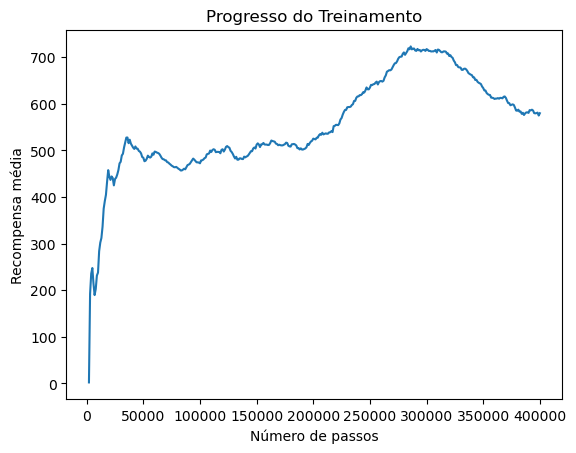

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 990          |
|    ep_rew_mean          | 580          |
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 782          |
|    time_elapsed         | 9730         |
|    total_timesteps      | 400384       |
| train/                  |              |
|    approx_kl            | 0.0087221265 |
|    clip_fraction        | 0.312        |
|    clip_range           | 0.1          |
|    entropy_loss         | -6.23        |
|    explained_variance   | 0.525        |
|    learning_rate        | 0.0001       |
|    loss                 | 1.6          |
|    n_updates            | 31270        |
|    policy_gradient_loss | 0.0037       |
|    std                  | 2.05         |
|    value_loss           | 9.71         |
------------------------------------------


In [14]:
desafio = "CarRacing-v2"
env = gym.make(desafio)
env = Monitor(env)
nome_modelo = f"ModeloPPO_Gym_{desafio}.zip"

if os.path.exists(nome_modelo):
    print(f"Carregando modelo pré-treinado: {nome_modelo}")
    modelo = PPO.load(nome_modelo, env=env)
else:
    print("Criando um novo modelo")
    modelo = PPO(
        "CnnPolicy",
        env=DummyVecEnv([lambda: env]),
        verbose=1,
        learning_rate=1e-4,
        n_steps=512,
        n_epochs=10,
        ent_coef=0.01,
        gamma=0.99,
        vf_coef=0.5,
        max_grad_norm=0.5,
        gae_lambda=0.95,
        clip_range=0.1
    )

total_timesteps = 400000
callback_list = CallbackList(
    [CheckpointCallback(save_freq=100000, save_path='./'), PlottingCallback()])
modelo.learn(total_timesteps=total_timesteps, callback=callback_list)

#### Na célula abaixo, modelo PPO é salvo após o treinamento. Analisando o código::

- Salvamento do Modelo:
    - Utiliza o método *modelo.save(nome_modelo)* para salvar o modelo treinado no arquivo especificado por nome_modelo.

In [13]:
modelo.save(nome_modelo)

#### Na célula abaixo, é carregado o modelo PPO treinado para o ambiente CarRacing-v2 e sua execução é visualizada. Analisando o código:

- Carregamento do Modelo Treinado:
    - Utiliza o método PPO.load(nome_modelo) para carregar o modelo treinado previamente e salvo no arquivo especificado por nome_modelo.
- Configuração do Ambiente de Visualização:
    - Cria um novo ambiente do Gym (gym.make(desafio, render_mode="rgb_array")) configurado para gerar um array de pixels (rgb_array) como saída durante a renderização.
- Execução do Modelo no Ambiente:
    - Inicializa o ambiente.
    - Para cada passo (máximo de 3000):
        - O modelo prevê uma ação com base na observação atual.
        - A ação é executada no ambiente, e o próximo estado, recompensa e outras informações são obtidos.
        - O frame correspondente à renderização do ambiente é adicionado à lista frames.
        - Se o episódio estiver concluído (terminated ou truncated), o ambiente é redefinido para iniciar um novo episódio.
- Fechamento do Ambiente:
    - Fecha o ambiente após a execução do loop.
- Criação e Exibição do Vídeo:
    - Utiliza a função gerar_video_e_exibir para criar um vídeo a partir dos frames coletados durante a execução e exibi-lo diretamente no ambiente Jupyter Notebook.

Este código permite visualizar como o modelo PPO treinado se comporta no ambiente CarRacing-v2. 

### Exibição do resultado treinado para CarRacing-v2

In [15]:
# @title Exibição do resultado treinado para CarRacing-v2 PPO

model = PPO.load(nome_modelo)
env = gym.make(desafio, render_mode="rgb_array")
frames = []
obs, info = env.reset()
for _ in range(3000):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        obs, info = env.reset()
        break
env.close()
gerar_video_e_exibir(frames, nome_modelo)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
